## Importing Libraries

In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import regex as re
import emoji
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import seaborn as sns

In [116]:
import csv
from wordcloud import WordCloud
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import matplotlib.colors as mcolors

## Reading Dataset

In [117]:
dataset = pd.read_csv('duringelection.csv')

## Understanding the Data

In [118]:
dataset.head()

,Method,Tweet,Username,Dates
0,Manual,Comelec says there are onsite technicians in p...,@cnnphilippines,5/9/2022
1,Manual,"The campaign period already ended on May 7, bu...",@cnnphilippines,5/9/2022
2,Manual,Comelec advises the public that all complaints...,@cnnphilippines,5/9/2022
3,Manual,The 2022 national elections is proceeding with...,@cnnphilippines,5/9/2022
4,Manual,WATCH: Bongbong Marcos casting his ballot in B...,@cnnphilippines,5/9/2022


In [119]:
dataset.shape

(4997, 4)

In [120]:
dataset.dtypes

Method      object
Tweet       object
Username    object
Dates       object
dtype: object

In [121]:
dataset.describe()

,Method,Tweet,Username,Dates
count,4997,4997,4997,4997
unique,1,3725,2065,1
top,Manual,#Eleksyon2022,@ABSCBNNews,5/9/2022
freq,4997,22,116,4997


In [122]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4997 entries, 0 to 4996
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Method    4997 non-null   object
 1   Tweet     4997 non-null   object
 2   Username  4997 non-null   object
 3   Dates     4997 non-null   object
dtypes: object(4)
memory usage: 156.3+ KB


In [123]:
dataset.isna().sum()

Method      0
Tweet       0
Username    0
Dates       0
dtype: int64

## Data Cleaning

In [124]:
#Raw Dataset
dataset

,Method,Tweet,Username,Dates
0,Manual,Comelec says there are onsite technicians in p...,@cnnphilippines,5/9/2022
1,Manual,"The campaign period already ended on May 7, bu...",@cnnphilippines,5/9/2022
2,Manual,Comelec advises the public that all complaints...,@cnnphilippines,5/9/2022
3,Manual,The 2022 national elections is proceeding with...,@cnnphilippines,5/9/2022
4,Manual,WATCH: Bongbong Marcos casting his ballot in B...,@cnnphilippines,5/9/2022
...,...,...,...,...
4992,Manual,Today's color is 💜\nIlabas ang daliri! #2022NL...,@peejayreyes,5/9/2022
4993,Manual,First thing I did this morning was to change m...,@mikeeeemol,5/9/2022
4994,Manual,"Deactivated na ako sa precinct finder, paano y...",@SpadeBlackhart,5/9/2022
4995,Manual,Presidential candidate @bongbongmarcos\ncasts ...,@tmtcathyvalente,5/9/2022


In [125]:
#1 Drop unnecessary columns

dataset.drop(['Method','Username','Dates'], axis=1, inplace=True)
dataset

,Tweet
0,Comelec says there are onsite technicians in p...
1,"The campaign period already ended on May 7, bu..."
2,Comelec advises the public that all complaints...
3,The 2022 national elections is proceeding with...
4,WATCH: Bongbong Marcos casting his ballot in B...
...,...
4992,Today's color is 💜\nIlabas ang daliri! #2022NL...
4993,First thing I did this morning was to change m...
4994,"Deactivated na ako sa precinct finder, paano y..."
4995,Presidential candidate @bongbongmarcos\ncasts ...


In [126]:
#Get the exact duplicate tweets in the dataframe
print("Duplicate Tweets:", len(dataset['Tweet'])-len(dataset['Tweet'].drop_duplicates()))

Duplicate Tweets: 1272


In [127]:
# 2 Remove Exact Duplicate Tweets
# Drop the last duplicate and keep the first one
dataset.drop_duplicates(subset='Tweet', keep="first", inplace=True)
dataset = dataset.reset_index()

In [128]:
dataset.drop(['index'], axis=1, inplace=True)
dataset

,Tweet
0,Comelec says there are onsite technicians in p...
1,"The campaign period already ended on May 7, bu..."
2,Comelec advises the public that all complaints...
3,The 2022 national elections is proceeding with...
4,WATCH: Bongbong Marcos casting his ballot in B...
...,...
3720,Because these things will change #Eleksyon2022...
3721,"To all my Filo moots, this is it, importante a..."
3722,Ramdam ko ang frustration ni @marizumali\nsa r...
3723,Today's color is 💜\nIlabas ang daliri! #2022NL...


In [129]:
# Get the percentage of emojis in the dataset
def calculate_percentage_of_emojis(text):
    emoji_pattern = re.compile(r'\p{Emoji}')
    
    emojis = emoji_pattern.findall(text)
    
    # Calculate the percentage of Unicode emojis
    total_chars = len(text)
    if total_chars > 0:
        percentage = (len(emojis) / total_chars) * 100
    else:
        percentage = 0
    return percentage

overall_percentage_of_emojis = dataset['Tweet'].apply(calculate_percentage_of_emojis).mean()

print(f"Overall Percentage of Emojis in the Dataset: {overall_percentage_of_emojis:.2f}%")

Overall Percentage of Emojis in the Dataset: 9.38%


In [130]:
# 3 Transform Emojis to Text
def transform_emojis(text):
    text = emoji.demojize(text, delimiters=(" ", " "))
    return text

dataset['Tweet'] = dataset['Tweet'].apply(transform_emojis)
dataset

,Tweet
0,Comelec says there are onsite technicians in p...
1,"The campaign period already ended on May 7, bu..."
2,Comelec advises the public that all complaints...
3,The 2022 national elections is proceeding with...
4,WATCH: Bongbong Marcos casting his ballot in B...
...,...
3720,Because these things will change #Eleksyon2022...
3721,"To all my Filo moots, this is it, importante a..."
3722,Ramdam ko ang frustration ni @marizumali\nsa r...
3723,Today's color is purple_heart \nIlabas ang da...


In [131]:
# 4 Replace "#" with the word "hashtag" in the "Tweets" column
dataset['Tweet'] = dataset['Tweet'].str.replace("#", "hashtag")
dataset

,Tweet
0,Comelec says there are onsite technicians in p...
1,"The campaign period already ended on May 7, bu..."
2,Comelec advises the public that all complaints...
3,The 2022 national elections is proceeding with...
4,WATCH: Bongbong Marcos casting his ballot in B...
...,...
3720,Because these things will change hashtagEleksy...
3721,"To all my Filo moots, this is it, importante a..."
3722,Ramdam ko ang frustration ni @marizumali\nsa r...
3723,Today's color is purple_heart \nIlabas ang da...


In [132]:
# 5 Remove non-alphanumeric characters, spaces & links
def clean_text(text):
    text = text.replace('?', ' ').replace('!', ' ') # Remove question marks, exclamation points
    text = ' '.join([word for word in text.split() if not word.startswith('@')]) # Remove mention tags
    text = text.replace('\n', ' ') # Remove newline characters

    # Remove all non-alphanumeric characters except hashtags, underscores, and spaces
    text = re.sub(r'[^a-zA-Z0-9_#\s]', '', text)

    # Remove links (http/s and youtube)
    text = ' '.join([word for word in text.split() if not word.startswith(('http://', 'https://', 'youtube', 'youtu be'))]) 
    text = text.replace('...', ' ') # Remove ellipses
    text = ' '.join(text.split()) # Replace multiple spaces with a single space
    text = text.strip() # Remove leading/trailing spaces
    return text

dataset['Tweet'] = dataset['Tweet'].apply(clean_text)
print(dataset)

                                                  Tweet
0     Comelec says there are onsite technicians in p...
1     The campaign period already ended on May 7 but...
2     Comelec advises the public that all complaints...
3     The 2022 national elections is proceeding with...
4     WATCH Bongbong Marcos casting his ballot in Ba...
...                                                 ...
3720  Because these things will change hashtagEleksy...
3721  To all my Filo moots this is it importante ang...
3722  Ramdam ko ang frustration ni sa report niya a ...
3723  Todays color is purple_heart Ilabas ang daliri...
3724  Deactivated na ako sa precinct finder paano ya...

[3725 rows x 1 columns]


In [133]:
# 6 Tokenization
# nltk.download('punkt')

dataset['Tokenized_Tweets'] = dataset['Tweet'].apply(lambda x: word_tokenize(x))

dataset['Tokenized_Tweets']

0       [Comelec, says, there, are, onsite, technician...
1       [The, campaign, period, already, ended, on, Ma...
2       [Comelec, advises, the, public, that, all, com...
3       [The, 2022, national, elections, is, proceedin...
4       [WATCH, Bongbong, Marcos, casting, his, ballot...
                              ...                        
3720    [Because, these, things, will, change, hashtag...
3721    [To, all, my, Filo, moots, this, is, it, impor...
3722    [Ramdam, ko, ang, frustration, ni, sa, report,...
3723    [Todays, color, is, purple_heart, Ilabas, ang,...
3724    [Deactivated, na, ako, sa, precinct, finder, p...
Name: Tokenized_Tweets, Length: 3725, dtype: object

In [134]:
# 7 Case Transformation
# Function to transform tokenized tweets to lowercase
def lowercase_tokens(tokens):
    return [token.lower() for token in tokens]

dataset['Tokenized_Tweets'] = dataset['Tokenized_Tweets'].apply(lambda x: lowercase_tokens(x))
print(dataset['Tokenized_Tweets'])

0       [comelec, says, there, are, onsite, technician...
1       [the, campaign, period, already, ended, on, ma...
2       [comelec, advises, the, public, that, all, com...
3       [the, 2022, national, elections, is, proceedin...
4       [watch, bongbong, marcos, casting, his, ballot...
                              ...                        
3720    [because, these, things, will, change, hashtag...
3721    [to, all, my, filo, moots, this, is, it, impor...
3722    [ramdam, ko, ang, frustration, ni, sa, report,...
3723    [todays, color, is, purple_heart, ilabas, ang,...
3724    [deactivated, na, ako, sa, precinct, finder, p...
Name: Tokenized_Tweets, Length: 3725, dtype: object


In [135]:
# Create Abbreviation Dictionary
abbreviation_dict = {}
abbreviation = pd.read_csv('abbreviation_updated.csv')
with open('abbreviation_updated.csv', mode='r') as inp:
  reader = csv.reader(inp)
  abbreviation_dict = {rows[0]:rows[1] for rows in reader}
abbreviation_dict

{'88m': 'bbm',
 'accling': 'queer',
 'ad': 'advertisement',
 'agri': 'agricultural',
 'amp ': 'ang puta',
 'ampalaya': 'bitter',
 'anniv': 'anniversary',
 'app': 'application',
 'ar': 'augmented reality',
 'atty': 'attorney',
 'ave': 'avenue',
 'b4': 'before',
 'babym': 'bbm',
 'bcoz': 'because',
 'bcs': 'because',
 'bec': 'because',
 'beh': 'best friend',
 'bei': 'board of election inspector',
 'bes': 'best friend',
 'besh': 'best friend',
 'beshie': 'best friend',
 'beybiem': 'bbm',
 'bgy': 'barangay',
 'bishies': 'best friend',
 'blengbong': 'bongbong',
 'bp': 'bise presidente',
 'brgy': 'barangay',
 'brgys': 'barangays',
 'bs': 'bull shit',
 'bugok': 'stupid',
 'bull': 'ridiculous',
 'c/o': 'credit to the owner',
 'camsur': 'camarines sur',
 'chariz': 'joke',
 'charot': 'joke',
 'charots': 'joke',
 'clav': 'commitee on local absentee voting',
 'cmd': 'christian muslim democrats',
 'coc': 'certificate of candidacy',
 'cocs': 'certificate of candidacy',
 'coe': 'commission on electio

In [136]:
#Adding underscores for abbreviation definitions that have more than one word

abbreviation_dict = {key:value.replace(' ','_')for key, value in abbreviation_dict.items()}
abbreviation_dict

{'88m': 'bbm',
 'accling': 'queer',
 'ad': 'advertisement',
 'agri': 'agricultural',
 'amp ': 'ang_puta',
 'ampalaya': 'bitter',
 'anniv': 'anniversary',
 'app': 'application',
 'ar': 'augmented_reality',
 'atty': 'attorney',
 'ave': 'avenue',
 'b4': 'before',
 'babym': 'bbm',
 'bcoz': 'because',
 'bcs': 'because',
 'bec': 'because',
 'beh': 'best_friend',
 'bei': 'board_of_election_inspector',
 'bes': 'best_friend',
 'besh': 'best_friend',
 'beshie': 'best_friend',
 'beybiem': 'bbm',
 'bgy': 'barangay',
 'bishies': 'best_friend',
 'blengbong': 'bongbong',
 'bp': 'bise_presidente',
 'brgy': 'barangay',
 'brgys': 'barangays',
 'bs': 'bull_shit',
 'bugok': 'stupid',
 'bull': 'ridiculous',
 'c/o': 'credit_to_the_owner',
 'camsur': 'camarines_sur',
 'chariz': 'joke',
 'charot': 'joke',
 'charots': 'joke',
 'clav': 'commitee_on_local_absentee_voting',
 'cmd': 'christian_muslim_democrats',
 'coc': 'certificate_of_candidacy',
 'cocs': 'certificate_of_candidacy',
 'coe': 'commission_on_electio

In [137]:
# 8 Abbreviation Transformation
def transform_abbreviations_within_tokens(tokens, abbreviation_dict):
    transformed_tokens = []
    
    for token in tokens:
        words = token.split()
        transformed_words = []
        
        for word in words:
            if word in abbreviation_dict:
                transformed_words.append(abbreviation_dict[word])
            else:
                transformed_words.append(word)
        
        transformed_token = ' '.join(transformed_words)
        transformed_tokens.append(transformed_token)
    
    return transformed_tokens

dataset['Tokenized_Tweets'] = dataset['Tokenized_Tweets'].apply(lambda x: transform_abbreviations_within_tokens(x, abbreviation_dict))
print(dataset['Tokenized_Tweets'])

0       [comelec, says, there, are, onsite, technician...
1       [the, campaign, period, already, ended, on, ma...
2       [comelec, advises, the, public, that, all, com...
3       [the, 2022, national, elections, is, proceedin...
4       [watch, bongbong, marcos, casting, his, ballot...
                              ...                        
3720    [because, these, things, will, change, hashtag...
3721    [to, all, my, filipino, mutuals, this, is, it,...
3722    [ramdam, ko, ang, frustration, ni, sa, report,...
3723    [todays, color, is, purple_heart, ilabas, ang,...
3724    [deactivated, na, ako, sa, precinct, finder, p...
Name: Tokenized_Tweets, Length: 3725, dtype: object


In [138]:
# 9 Misspelled Words Transformation
from chardet import detect
from spellchecker import SpellChecker
import nltk
from nltk.tokenize import word_tokenize

spell_checker_en = SpellChecker()

tagalog_word_list = []
with open('tl_PH.aff', 'r', encoding='utf-8') as word_list_file:
    tagalog_word_list = [line.strip() for line in word_list_file]


def detect_language(text):
    try:
        return detect(text)
    except:
        return "unknown" 
def correct_words(tokens):
    language = detect_language(' '.join(tokens))
    
    corrected_tokens = [
        spell_checker_en.correction(word) if language == 'en' else
        word.lower() if language == 'tl' and word.lower() in tagalog_word_list else
        word
        for word in tokens
    ]

    return corrected_tokens

dataset['Corrected_Words'] = dataset['Tokenized_Tweets'].apply(correct_words)
print(dataset['Corrected_Words'])

0       [comelec, says, there, are, onsite, technician...
1       [the, campaign, period, already, ended, on, ma...
2       [comelec, advises, the, public, that, all, com...
3       [the, 2022, national, elections, is, proceedin...
4       [watch, bongbong, marcos, casting, his, ballot...
                              ...                        
3720    [because, these, things, will, change, hashtag...
3721    [to, all, my, filipino, mutuals, this, is, it,...
3722    [ramdam, ko, ang, frustration, ni, sa, report,...
3723    [todays, color, is, purple_heart, ilabas, ang,...
3724    [deactivated, na, ako, sa, precinct, finder, p...
Name: Corrected_Words, Length: 3725, dtype: object


In [139]:
# Store Stopwords
tag_stopwords = (['akin', 'aking', 'ako', 'alin', 'am', 'amin', 'aming', 'ang', 'ano', 'anumang', 'apat', 'at', 'atin', 'ating', 'ay', 'ba', 'bababa', 'bago', 'bakit', 'bawat', 'bilang', 'eh', 'dahil', 'dalawa', 'dapat','daw', 'din', 'dito', 'doon', 'gagawin', 'gayunman', 'ginagawa', 'ginawa', 'ginawang', 'gumawa', 'gusto', 'habang', 'hanggang', 'hindi', 'huwag', 'iba', 'ibaba', 'ibabaw', 'ibig', 'ikaw', 'ilagay', 'ilalim', 'ilan','ilang', 'inyong', 'isa', 'isang', 'itaas', 'ito', 'iyo', 'iyon', 'iyong', 'ka', 'kahit', 'kailangan', 'kailanman', 'kami', 'kanila', 'kanilang', 'kanino','kaniyang', 'kanya', 'kanyang', 'kapag', 'kapwa', 'karamihan', 'katiyakan', 'katulad', 'kasi', 'kay', 'kaya','kayo', 'kaysa', 'ko', 'kong', 'kulang', 'kumuha', 'kung', 'laban', 'lahat', 'lamang','lang', 'likod', 'lima', 'ma', 'maaari', 'maaaring', 'mag', 'maging', 'mahusay', 'makita', 'marami', 'marapat', 'masyado', 'may', 'mayroon', 'mga', 'minsan', 'mismo','mo', 'mula', 'muli', 'na', 'nabanggit', 'naging', 'nagkaroon', 'nais', 'nakita', 'naman', 'namin', 'nang', 'napaka', 'nasa', 'narito', 'nasaan','natin', 'ng', 'nga', 'ngayon', 'ngayong','ni', 'nila', 'nilang', 'nito', 'niya', 'niyang','niyo', 'noon', 'noong','nung', 'nyo', 'o', 'pa', 'pala', 'pag', 'paano', 'pababa', 'paggawa', 'pagitan', 'pagkakaroon', 'pagkatapos', 'palabas', 'pamamagitan', 'panahon', 'pangalawa', 'para', 'paraan', 'pareho', 'pataas', 'pero', 'pumunta', 'pumupunta', 'sa', 'saan', 'sabi', 'sabihin','sana', 'sarili', 'sila', 'sino', 'siya','rin', 'tatlo', 'tayo','talaga', 'tulad', 'tungkol', 'una', 'wala', 'walang','wag', 'yan', 'yung'])
eng_stopwords = (" k","0o", "0s", "3a", "3b", "3d", "6b", "6o", "a", "a1", "a2", "a3", "a4", "ab", "able", "about", "above", "abst", "ac", "accordance", "according", "accordingly", "across", "act", "actually", "ad", "added", "adj", "ae", "af", "affected", "affecting", "affects", "after", "afterwards", "ag", "again", "against", "ah", "ain", "ain't", "aj", "al", "all", "allow", "allows", "almost", "alone", "along", "already", "also", "although", "always", "am", "among", "amongst", "amoungst", "amount", "an", "and", "announce", "another", "any", "anybody", "anyhow", "anymore", "anyone", "anything", "anyway", "anyways", "anywhere", "ao", "ap", "apart", "apparently", "appear", "appreciate", "appropriate", "approximately", "ar", "are", "aren", "arent", "aren't", "arise", "around", "as", "a's", "aside", "ask", "asking", "associated", "at", "au", "auth", "av", "available", "aw", "away", "awfully", "ax", "ay", "az", "b", "b1", "b2", "b3", "ba", "back", "bc", "bd", "be", "became", "because", "become", "becomes", "becoming", "been", "before", "beforehand", "begin", "beginning", "beginnings", "begins", "behind", "being", "believe", "below", "beside", "besides", "best", "better", "between", "beyond", "bi", "bill", "biol", "bj", "bk", "bl", "bn", "both", "bottom", "bp", "br", "brief", "briefly", "bs", "bt", "bu", "but", "bx", "by", "c", "c1", "c2", "c3", "ca", "call", "came", "can", "cannot", "cant", "can't", "cause", "causes", "cc", "cd", "ce", "certain", "certainly", "cf", "cg", "ch", "changes", "ci", "cit", "cj", "cl", "clearly", "cm", "c'mon", "cn", "co", "com", "come", "comes", "con", "concerning", "consequently", "consider", "considering", "contain", "containing", "contains", "corresponding", "could", "couldn", "couldnt", "couldn't", "course", "cp", "cq", "cr", "cry", "cs", "c's", "ct", "cu", "currently", "cv", "cx", "cy", "cz", "d", "d2", "da", "date", "dc", "dd", "de", "definitely", "describe", "described", "despite", "detail", "df", "di", "did", "didn", "didn't", "different", "dj", "dk", "dl", "do", "does", "doesn", "doesn't", "doing", "don", "done", "don't","dont", "down", "downwards", "dp", "dr", "ds", "dt", "du", "due", "during", "dx", "dy", "e", "e2", "e3", "ea", "each", "ec", "ed", "edu", "ee", "ef", "effect", "eg", "ei", "eight", "eighty", "either", "ej", "el", "eleven", "else", "elsewhere", "em", "empty", "en", "end", "ending", "enough", "entirely", "eo", "ep", "eq", "er", "es", "especially", "est", "et", "et-al", "etc", "eu", "ev", "even", "ever", "every", "everybody", "everyone", "everything", "everywhere", "ex", "exactly", "example", "except", "ey", "f", "f2", "fa", "far", "fc", "few", "ff", "fi", "fifteen", "fifth", "fify", "fill", "find", "fire", "first", "five", "fix", "fj", "fl", "fn", "fo", "followed", "following", "follows", "for", "former", "formerly", "forth", "forty", "found", "four", "fr", "from", "front", "fs", "ft", "fu", "full", "further", "furthermore", "fy", "g", "ga", "gave", "ge", "get", "gets", "getting", "gi", "give", "given", "gives", "giving", "gj", "gl", "go", "goes", "going", "gone", "got", "gotten", "gr", "greetings", "gs", "gy", "h", "h2", "h3", "had", "hadn", "hadn't", "happens", "hardly", "has", "hasn", "hasnt", "hasn't", "have", "haven", "haven't", "having", "he", "hed", "he'd", "he'll", "hello", "help", "hence", "her", "here", "hereafter", "hereby", "herein", "heres", "here's", "hereupon", "hers", "herself", "hes", "he's", "hh", "hi", "hid", "him", "himself", "his", "hither", "hj", "ho", "home", "hopefully", "how", "howbeit", "however", "how's", "hr", "hs", "http", "hu", "hundred", "hy", "i", "i2", "i3", "i4", "i6", "i7", "i8", "ia", "ib", "ibid", "ic", "id", "i'd", "ie", "if", "ig", "ignored", "ih", "ii", "ij", "il", "i'll", "im", "i'm", "immediate", "immediately", "importance", "important", "in", "inasmuch", "inc", "indeed", "index", "indicate", "indicated", "indicates", "information", "inner", "insofar", "instead", "interest", "into", "invention", "inward", "io", "ip", "iq", "ir", "is", "isn", "isn't", "it", "itd", "it'd", "it'll", "its", "it's", "itself", "iv", "i've", "ix", "iy", "iz", "j", "jj", "jr", "js", "jt", "ju", "just", "k", "ke", "keep", "keeps", "kept", "kg", "kj", "km", "know", "known", "knows", "ko", "l", "l2", "la", "largely", "last", "lately", "later", "latter", "latterly", "lb", "lc", "le", "least", "les", "less", "lest", "let", "lets", "let's", "lf", "like", "liked", "likely", "line", "little", "lj", "ll", "ll", "ln", "lo", "look", "looking", "looks", "los", "lr", "ls", "lt", "ltd", "m", "m2", "ma", "made", "mainly", "make", "makes", "many", "may", "maybe", "me", "mean", "means", "meantime", "meanwhile", "merely", "mg", "might", "mightn", "mightn't", "mill", "million", "mine", "miss", "ml", "mn", "mo", "more", "moreover", "most", "mostly", "move", "mr", "mrs", "ms", "mt", "mu", "much", "mug", "must", "mustn", "mustn't", "my", "myself", "n", "n2", "na", "name", "namely", "nay", "nc", "nd", "ne", "near", "nearly", "necessarily", "necessary", "need", "needn", "needn't", "needs", "neither", "never", "nevertheless", "new", "next", "ng", "ni", "nine", "ninety", "nj", "nl", "nn", "no", "nobody", "non", "none", "nonetheless", "noone", "nor", "normally", "nos", "not", "noted", "nothing", "novel", "now", "nowhere", "nr", "ns", "nt", "ny", "o", "oa", "ob", "obtain", "obtained", "obviously", "oc", "od", "of", "off", "often", "og", "oh", "oi", "oj", "ok", "okay", "ol", "old", "om", "omitted", "on", "once", "one", "ones", "only", "onto", "oo", "op", "oq", "or", "ord", "os", "ot", "other", "others", "otherwise", "ou", "ought", "our", "ours", "ourselves", "out", "outside", "over", "overall", "ow", "owing", "own", "ox", "oz", "p", "p1", "p2", "p3", "page", "pagecount", "pages", "par", "part", "particular", "particularly", "pas", "past", "pc", "pd", "pe", "per", "perhaps", "pf", "ph", "pi", "pj", "pk", "pl", "placed", "please", "plus", "pm", "pn", "po", "poorly", "possible", "possibly", "potentially", "pp", "pq", "pr", "predominantly", "present", "presumably", "previously", "primarily", "probably", "promptly", "proud", "provides", "ps", "pt", "pu", "put", "py", "q", "qj", "qu", "que", "quickly", "quite", "qv", "r", "r2", "ra", "ran", "rather", "rc", "rd", "re", "readily", "really", "reasonably", "recent", "recently", "ref", "refs", "regarding", "regardless", "regards", "related", "relatively", "research", "research-articl", "respectively", "resulted", "resulting", "results", "rf", "rh", "ri", "right", "rj", "rl", "rm", "rn", "ro", "rq", "rr", "rs", "rt", "ru", "run", "rv", "ry", "s", "s2", "sa", "said", "same", "saw", "say", "saying", "says", "sc", "sd", "se", "sec", "second", "secondly", "section", "see", "seeing", "seem", "seemed", "seeming", "seems", "seen", "self", "selves", "sensible", "sent", "serious", "seriously", "seven", "several", "sf", "shall", "shan", "shan't", "she", "shed", "she'd", "she'll", "shes", "she's", "should", "shouldn", "shouldn't", "should've", "show", "showed", "shown", "showns", "shows", "si", "side", "significant", "significantly", "similar", "similarly", "since", "sincere", "six", "sixty", "sj", "sl", "slightly", "sm", "sn", "so", "some", "somebody", "somehow", "someone", "somethan", "something", "sometime", "sometimes", "somewhat", "somewhere", "soon", "sorry", "sp", "specifically", "specified", "specify", "specifying", "sq", "sr", "ss", "st", "still", "stop", "strongly", "sub", "substantially", "successfully", "such", "sufficiently", "suggest", "sup", "sure", "sy", "system", "sz", "t", "t1", "t2", "t3", "take", "taken", "taking", "tb", "tc", "td", "te", "tell", "ten", "tends", "tf", "th", "than", "thank", "thanks", "thanx", "that", "that'll", "thats", "that's", "that've", "the", "their", "theirs", "them", "themselves", "then", "thence", "there", "thereafter", "thereby", "thered", "therefore", "therein", "there'll", "thereof", "therere", "theres", "there's", "thereto", "thereupon", "there've", "these", "they", "theyd", "they'd", "they'll", "theyre", "they're", "they've", "thickv", "thin", "think", "third", "this", "thorough", "thoroughly", "those", "thou", "though", "thoughh", "thousand", "three", "throug", "through", "throughout", "thru", "thus", "ti", "til", "tip", "tj", "tl", "tm", "tn", "to", "together", "too", "took", "top", "toward", "towards", "tp", "tq", "tr", "tried", "tries", "truly", "try", "trying", "ts", "t's", "tt", "tv", "twelve", "twenty", "twice", "two", "tx", "u", "u201d", "ue", "ui", "uj", "uk", "um", "un", "under", "unfortunately", "unless", "unlike", "unlikely", "until", "unto", "uo", "up", "upon", "ups", "ur", "us", "use", "used", "useful", "usefully", "usefulness", "uses", "using", "usually", "ut", "v", "va", "value", "various", "vd", "ve", "ve", "very", "via", "viz", "vj", "vo", "vol", "vols", "volumtype", "vq", "vs", "vt", "vu", "w", "wa", "want", "wants", "was", "wasn", "wasnt", "wasn't", "way", "we", "wed", "we'd", "welcome", "well", "we'll", "well-b", "went", "were", "we're", "weren", "werent", "weren't", "we've", "what", "whatever", "what'll", "whats", "what's", "when", "whence", "whenever", "when's", "where", "whereafter", "whereas", "whereby", "wherein", "wheres", "where's", "whereupon", "wherever", "whether", "which", "while", "whim", "whither", "who", "whod", "whoever", "whole", "who'll", "whom", "whomever", "whos", "who's", "whose", "why", "why's", "wi", "widely", "will", "willing", "wish", "with", "within", "without", "wo", "won", "wonder", "wont", "won't", "words", "world", "would", "wouldn", "wouldnt", "wouldn't", "www", "x", "x1", "x2", "x3", "xf", "xi", "xj", "xk", "xl", "xn", "xo", "xs", "xt", "xv", "xx", "y", "y2", "yes", "yet", "yj", "yl", "you", "youd", "you'd", "you'll", "your", "youre", "you're", "yours", "yourself", "yourselves", "you've", "yr", "ys", "yt", "z", "zero", "zi", "zz")

# Combine and sort the two
combined_stopwords = sorted(list(tag_stopwords) + list(eng_stopwords))

total_stopwords = len(combined_stopwords)

print(f"Total Combined Stopwords: {total_stopwords}")

Total Combined Stopwords: 1340


In [140]:
# 11 Stopwords Removal
for i, tokens in enumerate(dataset['Corrected_Words']):
    filtered_tokens = []
    for word in tokens:
        if word not in combined_stopwords:
            filtered_tokens.append(word)
    dataset['Corrected_Words'][i] = filtered_tokens

print(dataset)

                                                  Tweet  \
0     Comelec says there are onsite technicians in p...   
1     The campaign period already ended on May 7 but...   
2     Comelec advises the public that all complaints...   
3     The 2022 national elections is proceeding with...   
4     WATCH Bongbong Marcos casting his ballot in Ba...   
...                                                 ...   
3720  Because these things will change hashtagEleksy...   
3721  To all my Filo moots this is it importante ang...   
3722  Ramdam ko ang frustration ni sa report niya a ...   
3723  Todays color is purple_heart Ilabas ang daliri...   
3724  Deactivated na ako sa precinct finder paano ya...   

                                       Tokenized_Tweets  \
0     [comelec, says, there, are, onsite, technician...   
1     [the, campaign, period, already, ended, on, ma...   
2     [comelec, advises, the, public, that, all, com...   
3     [the, 2022, national, elections, is, proceedin...

In [141]:
# 12 Function to remove numbers
def remove_numbers_and_blank_spaces(tokens):
    number_pattern = r'\d+'
    tokens_without_numbers = []
    
    for token in tokens:
        token_without_numbers = re.sub(number_pattern, '', token).strip()
        if token_without_numbers:
            tokens_without_numbers.append(token_without_numbers)
    
    return tokens_without_numbers

# 13 Function to remove hashtags used
def remove_hashtags(tokens):
    hashtags_to_remove = ['hashtaghalalan', 'hashtagbilangpilipino', 'hashtagelectionph','hashtageleksyon']
    return [token for token in tokens if token not in hashtags_to_remove]

# 14 Function for lemmatization
def lemmatize_tokens(tokens):
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(token) for token in tokens]

def preprocess_text(text):
    # Apply lemmatization
    lemmatized_tokens = lemmatize_tokens(text)
    
    # Remove numbers and hashtags
    tokens_without_numbers = remove_numbers_and_blank_spaces(lemmatized_tokens)
    tokens_without_hashtags = remove_hashtags(tokens_without_numbers)
    
    cleaned_text = ', '.join(tokens_without_hashtags)
    
    return cleaned_text

dataset['Corrected_Words'] = dataset['Corrected_Words'].apply(preprocess_text)
print(dataset['Corrected_Words'])

0       comelec, onsite, technician, precinct, case, v...
1       campaign, period, ended, candidate, flyer, han...
2       comelec, advises, public, complaint, verified,...
3       national, election, proceeding, closure, petit...
4       watch, bongbong, marcos, casting, ballot, bata...
                              ...                        
3720    thing, change, httpsmusicapplecomphalbumchange...
3721    filipino, mutuals, importante, boto, vote, wis...
3722    ramdam, frustration, report, ago, natugunan, p...
3723    today, color, purple_heart, ilabas, daliri, ha...
3724          deactivated, precinct, finder, nakapagcheck
Name: Corrected_Words, Length: 3725, dtype: object


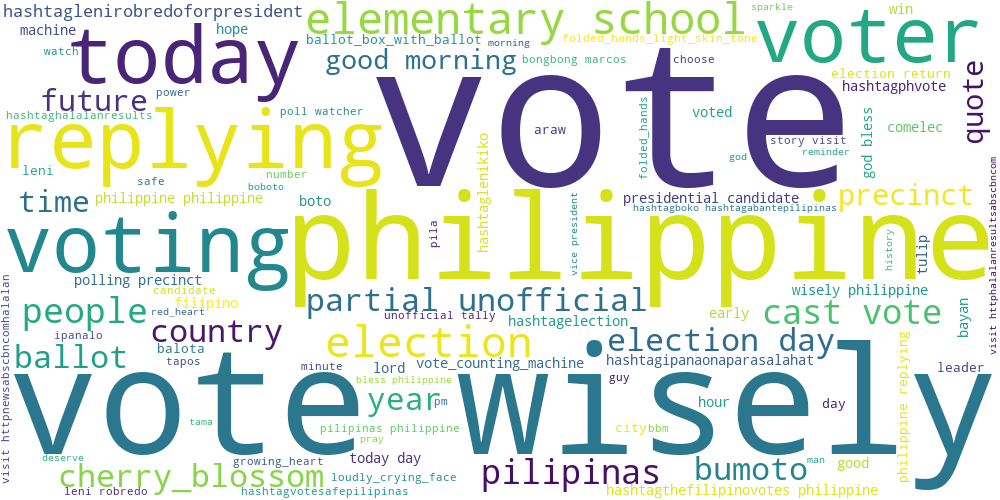

In [142]:
# The use of wordcloud to check if all steps were done correctly
long_string = ','.join(list(dataset['Corrected_Words'].values))
wordcloud = WordCloud(background_color="white", max_words=100, contour_width=3, contour_color='steelblue', width=1000, height=500)
wordcloud.generate(long_string)
wordcloud.to_image()

## Topic Modeling

In [143]:
import gensim
from gensim import corpora
import numpy as np

documents = dataset['Corrected_Words'].values
tokenized_documents = [doc.split(",") for doc in documents] 

#Create Dictionary
id2word = corpora.Dictionary(tokenized_documents)

#Create Corpus
texts = tokenized_documents

#Term Document Frequency
corpus = [id2word.doc2bow(doc) for doc in tokenized_documents] 

In [144]:
# Build the LDA model
num_topics = 4 
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=id2word, num_topics=num_topics, passes=15,
                                            random_state=42,chunksize=50,per_word_topics=True)
for topic_id, topic_words in lda_model.print_topics():
    print(f"Topic {topic_id}: {topic_words}")

Topic 0: 0.051*" vote" + 0.042*" philippine" + 0.035*" wisely" + 0.019*"vote" + 0.018*" folded_hands" + 0.016*" cherry_blossom" + 0.012*" pilipinas" + 0.012*" growing_heart" + 0.012*" country" + 0.011*" loudly_crying_face"
Topic 1: 0.026*"replying" + 0.019*" precinct" + 0.017*" voting" + 0.016*" school" + 0.016*" ballot" + 0.015*" voter" + 0.013*" machine" + 0.012*" elementary" + 0.010*" vote" + 0.010*" polling"
Topic 2: 0.015*" bumoto" + 0.014*" pila" + 0.013*" bayan" + 0.011*" boto" + 0.008*" tama" + 0.006*" iboboto" + 0.006*" lacson" + 0.006*" news" + 0.006*" araw" + 0.005*" update"
Topic 3: 0.030*" election" + 0.016*"good" + 0.014*" morning" + 0.013*" unofficial" + 0.012*" vote" + 0.010*" peaceful" + 0.010*"praying" + 0.010*" honest" + 0.009*" year" + 0.008*"election"


In [145]:
document_topics = []
for doc_bow in corpus:
    topics = lda_model[doc_bow]
    document_topics.append(topics)

print(f"Topics for Pre-Election Tweets: {document_topics[0]}")

Topics for Pre-Election Tweets: ([(0, 0.23240829), (1, 0.7208387), (2, 0.023342526), (3, 0.023410479)], [(0, [1]), (1, [1, 0]), (2, [0, 1]), (3, [1, 0]), (4, [0]), (5, [1]), (6, [1]), (7, [1]), (8, [1]), (9, [1])], [(0, [(1, 0.9993664)]), (1, [(0, 0.12304101), (1, 0.81099457)]), (2, [(0, 0.9822139), (1, 0.015710715)]), (3, [(0, 0.16304597), (1, 0.74902105)]), (4, [(0, 0.9998537)]), (5, [(1, 0.99997365)]), (6, [(1, 0.9989367)]), (7, [(1, 0.9988444)]), (8, [(1, 0.9984661)]), (9, [(1, 0.99962205)])])


### Coherence Score

In [146]:

coherence_model_lda = CoherenceModel(model=lda_model, texts=tokenized_documents, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.453434664747312


### Finding the Optimal Number of Topics

In [147]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=1):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        # model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics, random_state=100,
        #                                         chunksize=200, passes=15, 
        #                                         per_word_topics=True, id2word=id2word)
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=id2word, num_topics=num_topics, passes=15,
                                            random_state=42,chunksize=50,per_word_topics=True)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=lda_model, texts=tokenized_documents, dictionary=id2word, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

In [148]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=texts, start=2, limit=8, step=1)

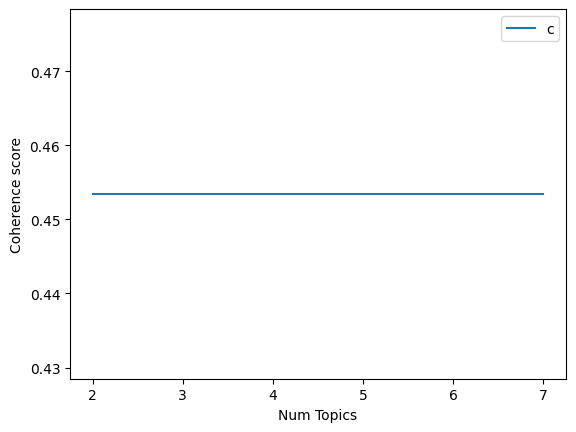

In [149]:
limit=8
start=2
step=1
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"),loc='best')
plt.show()

In [150]:
for m, cv in zip(x, coherence_values):
    print("Number of Topics =", m, "has Coherence Value of", round(cv,4))

Number of Topics = 2 has Coherence Value of 0.4534
Number of Topics = 3 has Coherence Value of 0.4534
Number of Topics = 4 has Coherence Value of 0.4534
Number of Topics = 5 has Coherence Value of 0.4534
Number of Topics = 6 has Coherence Value of 0.4534
Number of Topics = 7 has Coherence Value of 0.4534


### Topic Modeling Visualization

In [151]:
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
cloud = WordCloud(background_color='white', width=2500, height=2800, max_words=20,
                         colormap='tab10', color_func=lambda * args, **kwargs: cols[i],
                         prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)
topics

[(0,
  [(' vote', 0.05121754),
   (' philippine', 0.04215955),
   (' wisely', 0.035174638),
   ('vote', 0.018924313),
   (' folded_hands', 0.018488323),
   (' cherry_blossom', 0.015549507),
   (' pilipinas', 0.012362713),
   (' growing_heart', 0.012000248),
   (' country', 0.0115538435),
   (' loudly_crying_face', 0.011100116)]),
 (1,
  [('replying', 0.0263531),
   (' precinct', 0.019396681),
   (' voting', 0.016783893),
   (' school', 0.016381659),
   (' ballot', 0.015944982),
   (' voter', 0.015292266),
   (' machine', 0.01346183),
   (' elementary', 0.011804769),
   (' vote', 0.01020074),
   (' polling', 0.009941056)]),
 (2,
  [(' bumoto', 0.015325466),
   (' pila', 0.013975877),
   (' bayan', 0.012673934),
   (' boto', 0.011024403),
   (' tama', 0.0075392798),
   (' iboboto', 0.005865496),
   (' lacson', 0.0058467775),
   (' news', 0.005580981),
   (' araw', 0.0055695563),
   (' update', 0.005464034)]),
 (3,
  [(' election', 0.029902223),
   ('good', 0.016278714),
   (' morning', 0

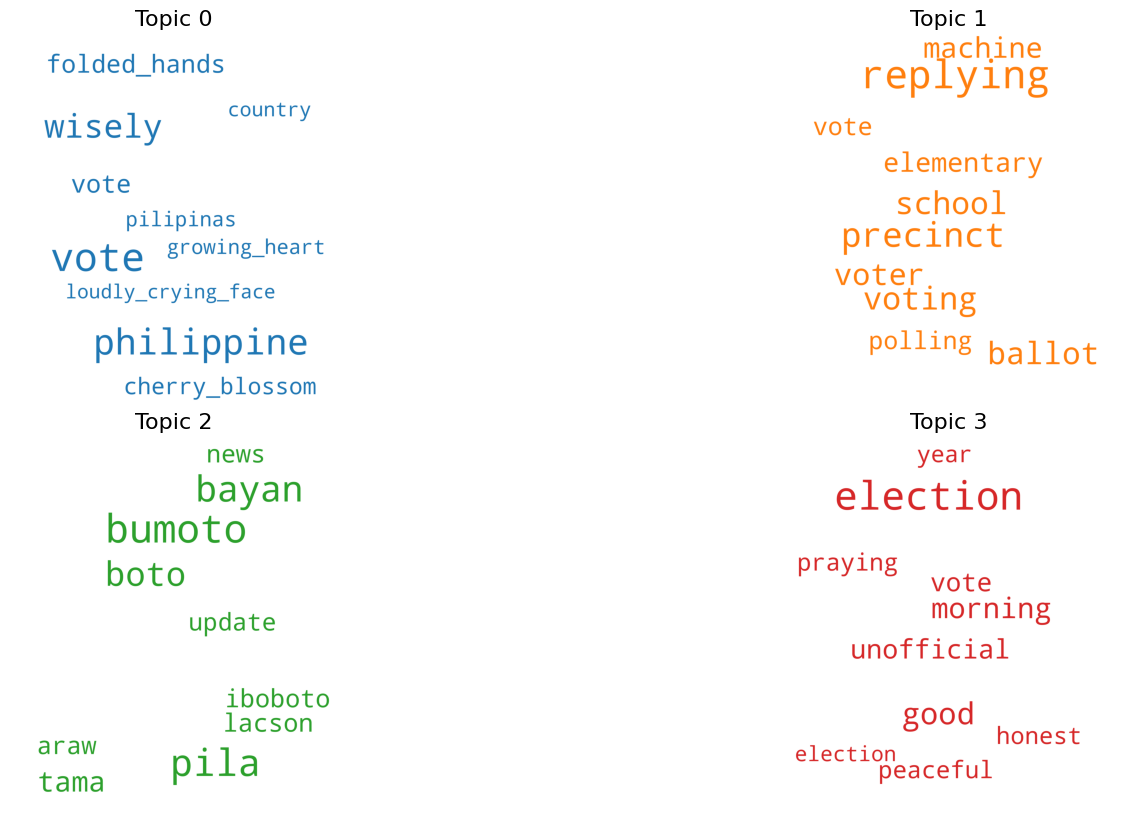

In [152]:
fig, axes = plt.subplots(2,2, figsize=(20,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words,max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic '+ str(i), fontdict=dict(size=16))
    plt.gca().axis('off')

plt.subplots_adjust(wspace=0, hspace=0.1)
plt.axis('off')
plt.margins(x=0,y=0)
plt.tight_layout
plt.show()
